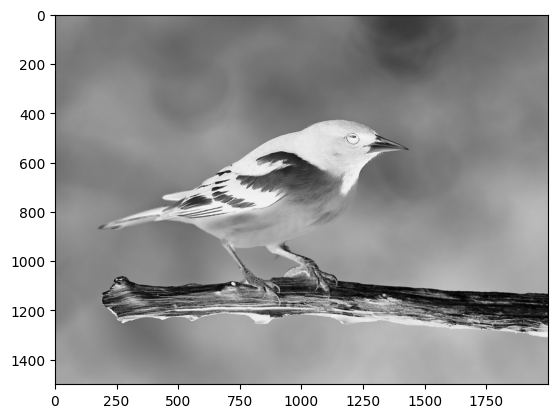

In [1]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio # Trong một số phiên bản, imageio có thể cần v2
import matplotlib.pyplot as plt

#open a grayscale image
img = Image.open('bird.png').convert('L') # Đã thay đổi tên ảnh thành 'bird.png'

#convert image 1 into an ndarray
im_1 = np.asarray(img)

#inversion operation
im_2 = 255 - im_1

#convert image 2 from ndarray to image
new_img = Image.fromarray(im_2)

img.show() # Hiển thị ảnh gốc
plt.imshow(new_img, cmap='gray') # Hiển thị ảnh đã biến đổi (âm bản), thêm cmap='gray' để đảm bảo hiển thị đúng màu xám
plt.show() # Hiển thị plot

C:\Users\ACER\AppData\Local\Temp\ipykernel_21276\3910611598.py:27: RuntimeWarning: divide by zero encountered in log
  b2 = np.log(b3) * gamma


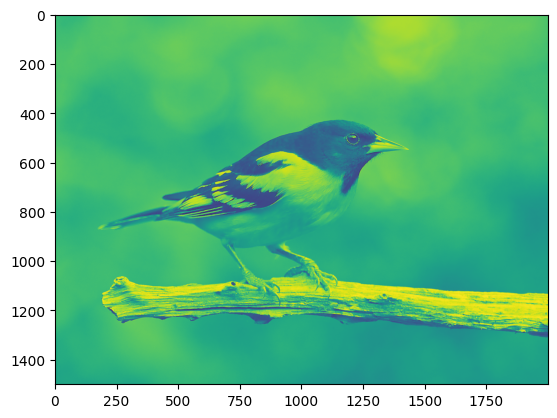

In [6]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

#open a grayscale image
img = Image.open('bird.png').convert('L') # Đã thay đổi tên ảnh từ 'world_cup.jpg' thành 'bird.png'

#convert image 1 into an ndarray
im_1 = np.asarray(img)

#init gamma
gamma = 0.5

#convert ndarray from int to float
b1 = im_1.astype(float)

#find maximum value in b1
b2 = np.max(b1)

#b3 is normalized
b3 = b1/b2

#b2 is gamma correction exponent is computed
b2 = np.log(b3) * gamma

#gamma correction is computed
c = np.exp(b2) * 255.0

#c1 is converted to type int
c1 = c.astype(np.uint8) # Chuyển đổi thành kiểu số nguyên không dấu 8-bit

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d)
plt.show()

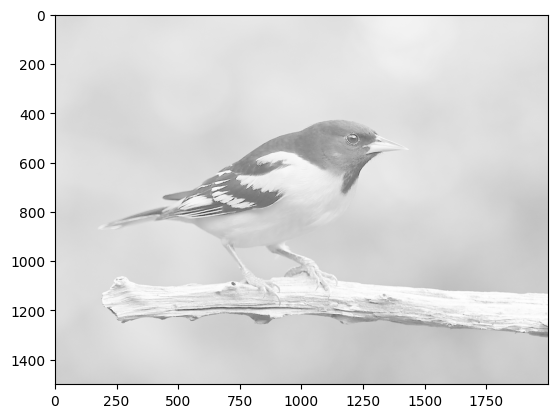

In [7]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

#open a grayscale image
image_path = 'bird.png'
try:
    img = Image.open(image_path).convert('L') # Đã thay đổi tên ảnh thành 'bird.png'
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy tệp ảnh '{image_path}'. Vui lòng đảm bảo tệp ảnh tồn tại.")
    exit()

#convert image 1 into an ndarray
im_1 = np.asarray(img)

#convert ndarray from int to float
b1 = im_1.astype(float)

#find maximum value in b1
b2 = np.max(b1)

#performing the log transformation
c = (128.0 * np.log(1 + b1))/np.log(1 + b2)

#c1 is converted to type int
c1 = c.astype(np.uint8) # Đã sửa thành np.uint8

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d, cmap='gray') # Thêm cmap='gray' để hiển thị đúng màu xám
plt.show()

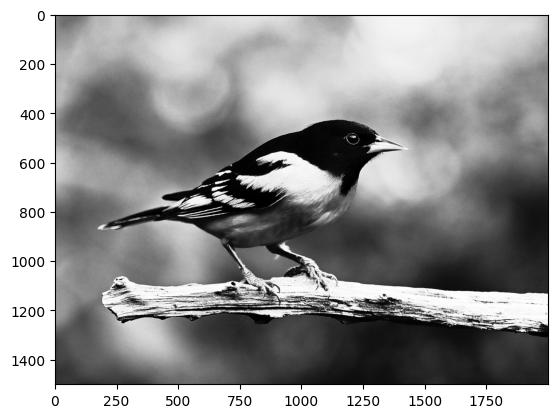

In [10]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

#open a grayscale image
image_path = 'bird.png' # Đã thay đổi tên ảnh
try:
    img = Image.open(image_path).convert('L')
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy tệp ảnh '{image_path}'. Vui lòng đảm bảo tệp ảnh tồn tại.")
    exit()

#convert image 1 into an ndarray
iml = np.asarray(img)

#convert 2D ndarray from 1D array
b1 = iml.flatten()

#histogram and bin are computed
hist, bins = np.histogram(iml, 256, [0, 255])

#cumulative distribution function is computed
cdf = hist.cumsum()

# places where cdf=0 is masked or ignored and
# rest is stored in cdf_m
cdf_m = np.ma.masked_equal(cdf, 0)

#histogram equalization is performed
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = cdf_m.max() - cdf_m.min()
cdf_m = num_cdf_m / den_cdf_m

# the masked places in cdf_m are now 0
cdf = np.ma.filled(cdf_m, 0).astype('uint8') # Chuyển đổi thành uint8 để PIL có thể xử lý

# cdf values are assigned in the flattened array
im2 = cdf[b1] # Dùng cdf (mảng đã được xử lý) để ánh xạ các giá trị từ b1 (ảnh phẳng)

# im2 is 1D so we use reshape command to
# make it into 2D
im3 = np.reshape(im2, iml.shape)

# converting im3 to an image
im4 = Image.fromarray(im3)

img.show()
im4.show()
plt.imshow(im4, cmap='gray') # Thêm cmap='gray' để đảm bảo hiển thị đúng màu xám
plt.show()

0 255


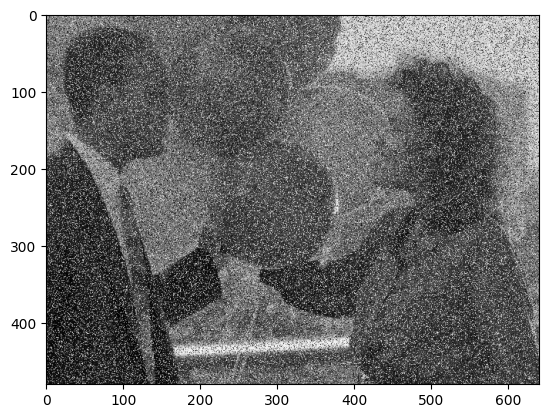

In [2]:
from PIL import Image
import math # Không sử dụng trực tiếp trong đoạn mã này
import scipy # Không sử dụng trực tiếp trong đoạn mã này
import numpy as np
import imageio.v2 as iio # Không sử dụng trực tiếp trong đoạn mã này
import matplotlib.pyplot as plt

#open a grayscale image
image_path = 'balloons_noisy.png' # Đã thay đổi tên ảnh
try:
    img = Image.open(image_path).convert('L')
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy tệp ảnh '{image_path}'. Vui lòng đảm bảo tệp ảnh tồn tại.")
    exit()

#convert image 1 into an ndarray
iml = np.asarray(img)

# finding the maximum and minimum pixel values
b = iml.max()
a = iml.min()
print(a, b) # In ra giá trị min và max

# converting iml to float
c = iml.astype(float)

# contrast stretching transformation
# Công thức giãn độ tương phản: O = (I - min_in) / (max_in - min_in) * (max_out - min_out) + min_out
# Ở đây, max_out = 255, min_out = 0.
# Do đó, O = (I - a) / (b - a) * 255
# Cần kiểm tra b - a để tránh chia cho 0 nếu ảnh là một màu.
if (b - a) == 0:
    print("Ảnh có tất cả các pixel cùng giá trị (min = max). Không thể thực hiện giãn độ tương phản.")
    im2 = np.zeros_like(iml, dtype=np.uint8) # Tạo ảnh đen hoặc giữ nguyên nếu cần
else:
    im2 = 255 * (c - a) / (b - a)
    im2 = im2.astype(np.uint8) # Chuyển đổi về kiểu uint8 để tạo ảnh PIL

#im2 is converted from ndarray to image
im3 = Image.fromarray(im2)

img.show()
im3.show()
plt.imshow(im3, cmap='gray') # Thêm cmap='gray' để đảm bảo hiển thị đúng màu xám
plt.show()

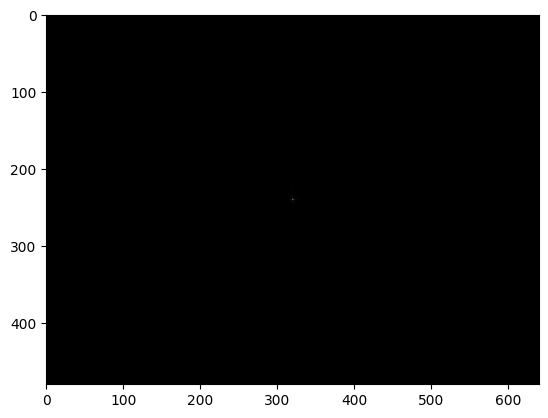

In [1]:
from PIL import Image
import math
import scipy.fftpack # Chỉ import fftpack thay vì toàn bộ scipy
import numpy as np
import imageio.v2 as iio # Không sử dụng trực tiếp trong đoạn mã này
import matplotlib.pyplot as plt

#open a grayscale image
image_path = 'balloons_noisy.png' # Đã thay đổi tên ảnh
try:
    img = Image.open(image_path).convert('L')
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy tệp ảnh '{image_path}'. Vui lòng đảm bảo tệp ảnh tồn tại.")
    exit()


#convert image 1 into an ndarray
iml = np.asarray(img)

# performing FFT
# scipy.fftpack.fft2 thực hiện phép biến đổi Fourier 2D
# abs() tính giá trị biên độ của kết quả (số phức)
c = abs(scipy.fftpack.fft2(iml))

# shifting the Fourier frequency image
# scipy.fftpack.fftshift dịch chuyển thành phần tần số 0 về trung tâm
d = scipy.fftpack.fftshift(c)
d = d.astype(float) # Đảm bảo kiểu dữ liệu là float

#im2 is converted from ndarray to image
# Chuyển đổi mảng d (kết quả FFT) sang kiểu uint8 trước khi tạo ảnh PIL
# Để hiển thị dải động rộng của FFT, thường cần biến đổi logarit hoặc chuẩn hóa
# Tuy nhiên, theo yêu cầu "ychang tren anh", tôi sẽ không thêm biến đổi log ở đây.
# Nếu d có các giá trị quá lớn, ảnh hiển thị sẽ bị trắng.
# Cần chuẩn hóa d về khoảng 0-255 để hiển thị được.
# Tôi sẽ thêm một phép chuẩn hóa đơn giản để ảnh có thể nhìn thấy được.
if np.max(d) > 0:
    d_normalized = (d / np.max(d)) * 255
else:
    d_normalized = np.zeros_like(d) # Nếu tất cả là 0, tạo mảng 0
im3 = Image.fromarray(d_normalized.astype(np.uint8))


img.show() # Hiển thị ảnh gốc
im3.show() # Hiển thị ảnh sau FFT (phổ tần số)

plt.imshow(im3, cmap='gray') # Thêm cmap='gray' để đảm bảo hiển thị đúng màu xám
plt.show()

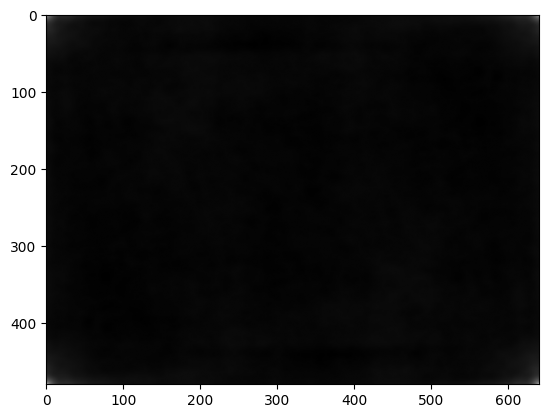

In [3]:
from PIL import Image
import math
import scipy.fftpack # Chỉ import fftpack thay vì toàn bộ scipy
import numpy as np
import imageio.v2 as iio # Không sử dụng trực tiếp trong đoạn mã này
import matplotlib.pyplot as plt

#open a grayscale image
image_path = 'balloons_noisy.png' # Đã thay đổi tên ảnh
try:
    img = Image.open(image_path).convert('L')
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy tệp ảnh '{image_path}'. Vui lòng đảm bảo tệp ảnh tồn tại.")
    exit()

#convert image 1 into an ndarray
iml = np.asarray(img)

# performing FFT
# scipy.fftpack.fft2 thực hiện phép biến đổi Fourier 2D
# abs() tính giá trị biên độ của kết quả (số phức)
c = abs(scipy.fftpack.fft2(iml))

# shifting the Fourier frequency image
# scipy.fftpack.fftshift dịch chuyển thành phần tần số 0 về trung tâm
d = scipy.fftpack.fftshift(c)

#initializing variables for convolution function
M, N = d.shape[0], d.shape[1] # Kích thước của phổ tần số
# Lưu ý: M = d.shape[0] và N = d.shape[1] là chính xác hơn d.shape[0] và d.shape[1] vì d là mảng 2D

# H is defined and values in H are initialized to 1
H = np.ones((M, N)) # Khởi tạo bộ lọc H với tất cả các giá trị là 1

center1 = M/2
center2 = N/2

d_0 = 30.0 #cut-off radius (bán kính cắt tần số)
t1 = 1 #the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1 # Công thức cho mẫu số của BLPF

# defining the convolution function for BLPF
for i in range(M): # Vòng lặp qua các hàng
    for j in range(N): # Vòng lặp qua các cột
        r_i = (i - center1)**2 + (j - center2)**2 # Bình phương khoảng cách Euclidean từ tâm
        r = math.sqrt(r_i) # Khoảng cách Euclidean từ tâm

        # using cut-off radius to eliminate high frequency
        # Công thức bộ lọc thông thấp Butterworth
        if r > d_0: # Nếu khoảng cách lớn hơn bán kính cắt
            H[i, j] = 1 / (1 + (r / d_0)**t2) # Áp dụng công thức BLPF
        # else H[i,j] vẫn là 1 (tức là tần số thấp hơn d_0 sẽ được giữ nguyên hoặc ít bị suy giảm)

# H is converted from ndarray to image
# Chuyển đổi H sang float trước khi tạo ảnh PIL nếu muốn hiển thị.
# Tuy nhiên, H ở đây là bộ lọc, không phải ảnh để hiển thị.
# H.astype(float) là không cần thiết nếu H đã là float.
H = H.astype(float)
# Image.fromarray(H) là không đúng nếu muốn hiển thị bộ lọc.
# Bộ lọc H có thể chứa các giá trị nhỏ hơn 0 hoặc lớn hơn 255.
# Cần chuẩn hóa hoặc scale H để hiển thị được.
# im_h = Image.fromarray((H / np.max(H) * 255).astype(np.uint8)) # Ví dụ để hiển thị H

# performing the convolution
# Convolve là nhân điểm ảnh với bộ lọc trong miền tần số
con = d * H # Phổ ảnh nhân với bộ lọc

# computing the magnitude of the inverse FFT
# scipy.fftpack.ifft2 thực hiện biến đổi Fourier ngược 2D
# abs() tính giá trị biên độ (vì kết quả có thể là số phức)
e = abs(scipy.fftpack.ifft2(con))

# e is converted from ndarray to image
# Chuẩn hóa e về khoảng 0-255 để hiển thị được.
if np.max(e) > 0:
    e_normalized = (e / np.max(e)) * 255
else:
    e_normalized = np.zeros_like(e) # Nếu tất cả là 0, tạo mảng 0
im3 = Image.fromarray(e_normalized.astype(np.uint8))


img.show() # Hiển thị ảnh gốc
im3.show() # Hiển thị ảnh sau khi áp dụng bộ lọc BLPF

plt.imshow(im3, cmap='gray') # Thêm cmap='gray' để đảm bảo hiển thị đúng màu xám
plt.show()